识别手写数字

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import datasets, svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

In [3]:
digits = datasets.load_digits()
digits_feature = digits.data
digits_target = digits.target
print(digits.keys())

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])



target == 每张图片的标签,即每张图片的数字

data == 将images按行展成一行的数据


In [4]:
print(digits.data[0])
digits.target[0]

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


0

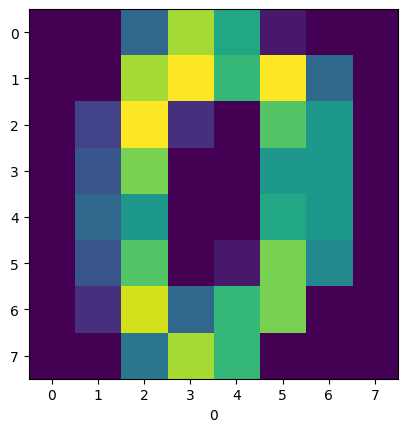

In [5]:
plt.imshow(digits.images[0])
plt.xlabel(digits.target_names[0])
plt.show()

调用svm.SVC() 支持向量机/C-Support Vector Classification.


In [6]:
clf = svm.SVC()
feature_train, feature_test, target_train, target_test = train_test_split(digits_feature, digits_target, test_size=0.5)

clf.fit(feature_train, target_train)
predicted = clf.predict(feature_test)

print(accuracy_score(predicted, target_test))

0.985539488320356


data/特征 可以手动由形状(8,8)的图片转换为2-D数组

In [7]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

In [8]:
print(sklearn.metrics.classification_report(target_test, predicted))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        77
           1       0.96      1.00      0.98        91
           2       1.00      1.00      1.00        82
           3       1.00      0.98      0.99       100
           4       0.99      1.00      0.99        96
           5       0.97      0.98      0.97        97
           6       1.00      1.00      1.00        90
           7       1.00      1.00      1.00        99
           8       0.97      0.94      0.96        90
           9       0.97      0.96      0.97        77

    accuracy                           0.99       899
   macro avg       0.99      0.99      0.99       899
weighted avg       0.99      0.99      0.99       899



Precision 精确度 假如66只动物里有13只是猫，但是其实这13只猫只有10只预测对了。模型认为是猫的13只动物里，有1条狗，两只猪。所以，Precision（猫）= 10/13 = 76.9%

Recall 召回率 以猫为例，在总共18只真猫中，我们的模型认为里面只有10只是猫，剩下的3只是狗，5只都是猪。所以，Recall（猫）= 10/18 = 55.6%

F1-Score指标综合了Precision与Recall的产出的结果。F1-Score的取值范围从0到1的，1代表模型的输出最好，0代表模型的输出结果最差。

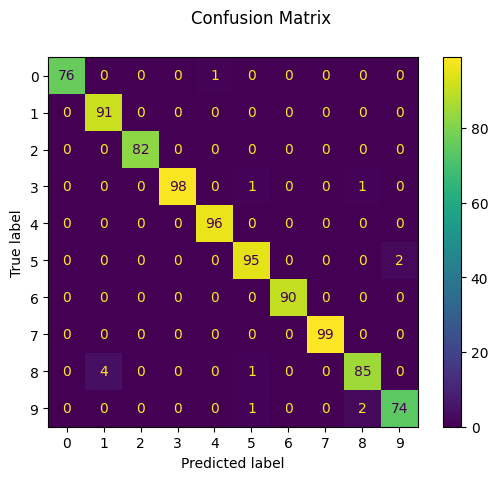

In [10]:
disp = ConfusionMatrixDisplay.from_predictions(target_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
plt.show()

混淆矩阵就是分别统计分类模型归错类，归对类的观测值个数，然后把结果放在一个表里展示出来。这个表就是混淆矩阵

第二四象限的对角线上的数值越大越好

更多关于混淆矩阵的信息https://blog.csdn.net/weixin_39613744/article/details/111345262